<a href="https://colab.research.google.com/github/NLChavesA/PredictionsSSFColombianPacific/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Time Series Analysys and design of a predictive model**
##**Adaptation and re-aggregation of the initial database**
For the analysis of time series of the research project, the variables were modified and a database was created to perform the analysis. All text variables were converted to integer variables as codes, the new database was built in Access 2019.

First we create code variables for the variables in text.
Second we organize the database, taking into account the original order of the consolidated CBD database

The variables associated with Date are created, creating a single number code variable, a Code_Date variable that concatenates the Month and Year code, and a Tex_Date variable that concatenates the month and year of the CBD database records.
At this point, a tabulated CBDT database is created with the code variables for the analysis.

However, using Access, relationships are created so that at the time of making the data visualizations, the initial text variables can be used and not generate disorientation.

A query is made to obtain the ODT base which contains the tabulated and coded data that have been ordered taking into account the date, this to perform the analysis of the time series.
In this analysys is performed a time series decomposition, wich is a technique that splits a time series into several components, each representing an underlying pattern category, trend, seasonality, and noise.

##**Descriptive and exploratory analysis of the time series**
###**Observing the trend and stability**
Initially we proceed to calculate the level of the series we must observe its stability, we must see if the chosen measure of central tendency has similar values in the time periods in which we divide the calendar. We will also have to observe its trend, that is, if it presents a constant direction of change
of level.

In [1]:
#Before starting please install these libraries
#Matplotlib install
!pip install -U matplotlib
#Seaborn instal
!pip3 install matplotlib
!pip3 install seaborn
#Ploty install
!pip3 install "notebook>=5.3" "ipywidgets>=7.2"
!pip3 install plotly
#Library import
import io
import datetime
import pandas as pd   
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from google.colab import files
from scipy import stats
from dateutil.parser import parse 
# Declaration allows the generated graphic to appear on the notebook
%matplotlib inline
import matplotlib.pyplot as plt
#The seasonal_decompose in statsmodels implements and SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
#Import the lookup table to visualize the stability trend of the monthly disembarkation series (kilograms), For this you must download the file ODT.xlsx that you find in the repository https://github.com/NLChavesA/PredictionsSSFColombianPacific
uploaded = files.upload()
data = io.BytesIO(uploaded['ODT.xlsx'])
df = pd.read_excel(data, sheet_name = 'ODT', header = 0, skiprows = 0, index_col='Date_Label2', parse_dates=['Date_Code'])

Saving ODT.xlsx to ODT.xlsx


By observing the graphic 1 and 2 it is possible to identify peaks and valleys, but there is no clear stability, although it is possible that there is a trend in the increase of this estimate due to the observed valleys, it is also important to identify that the peaks do not increase therefore it is risky to think that such a trend exists. Oscillations can be observed in an irregular manner. For December 2012 there was an estimate with a very high value, being notable and a value very different from the others (outlier).

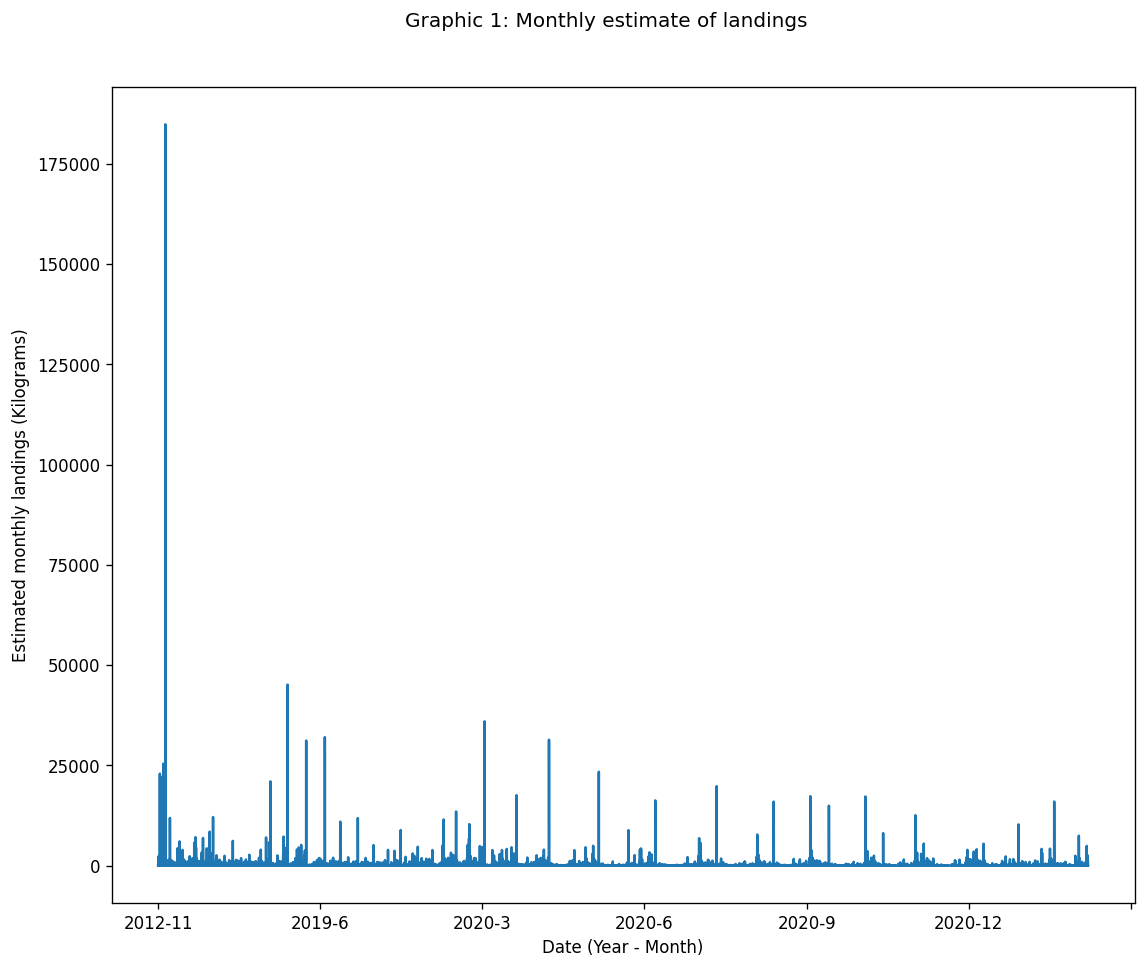

In [3]:
#Basic data preprocessing and visualization
#data.isna().Estimate.sum() # if value is 0 it shows that there are no null values in the data
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
df.Estimate.plot() #line graph for visualization of the data to see the magnitude of the estimates landings is changed repeatedly, showing the changes for different time intervals.
plt.suptitle('Graphic 1: Monthly estimate of landings', y=0.95)
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.ylabel(u'Estimated monthly landings (Kilograms)')  # Label y-axis
plt.show()
# Know the rows and columns
#df.size
#Know the table contents
#df.head()
#print(df)
#df.describe() #Know the basic statistics
#print(df['Estimate'].dtypes) #Know the type of data
#savefig("Graphic1.png", dpi=300)  # Save the figure on png and 300 DPI

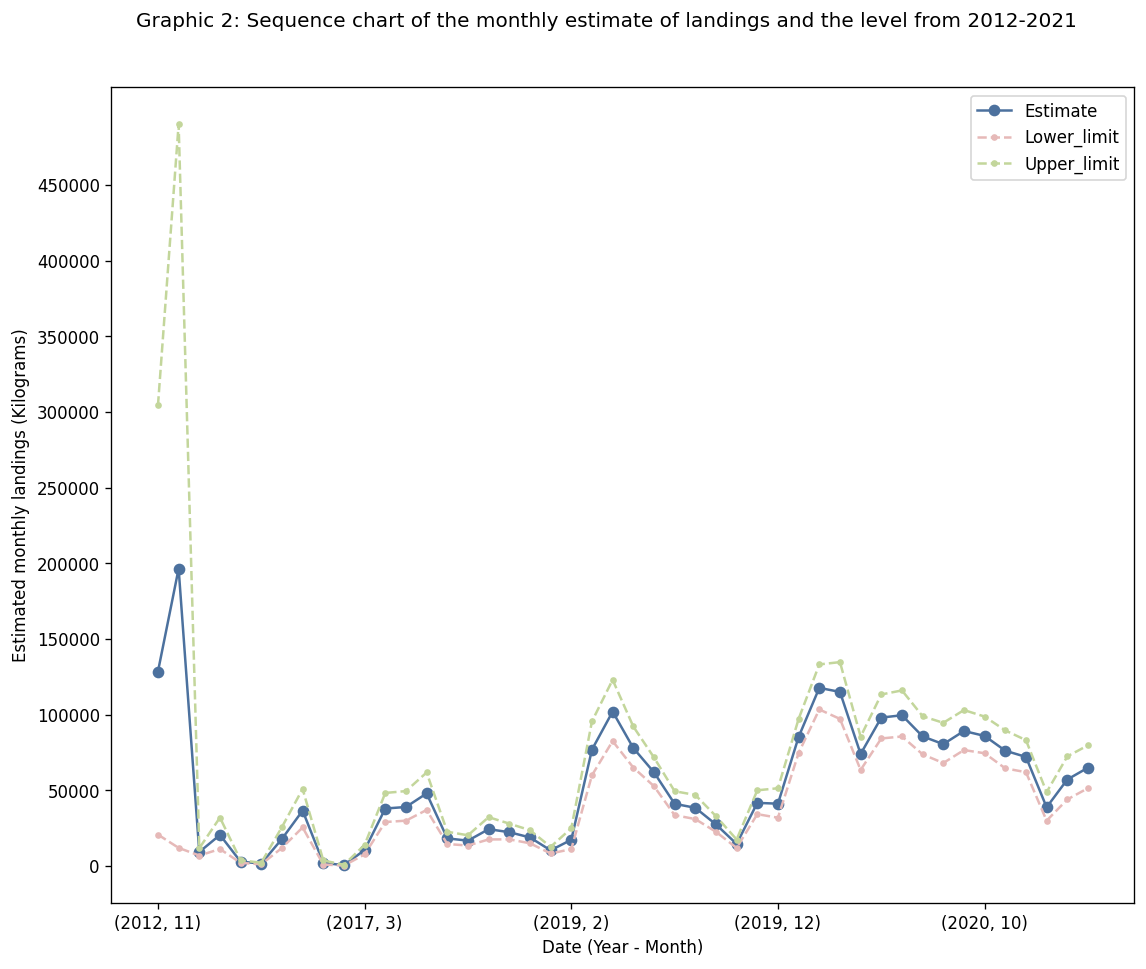

In [4]:
#Prepared the data
Serie1=df.groupby(['Year_Label','Month_ID'],sort=True).Estimate.sum()
Serie2=df.groupby(['Year_Label','Month_ID'],sort=True).Lower_limit.sum()
Serie3=df.groupby(['Year_Label','Month_ID'],sort=True).Upper_limit.sum()
#Graphic parameters
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
Serie1.plot(color='#4c719e', linestyle='-', marker='o')
Serie2.plot(color='#E6B9B8', linestyle='--', marker='.')
Serie3.plot(color='#C3D69B', linestyle='--', marker='.')
plt.suptitle('Graphic 2: Sequence chart of the monthly estimate of landings and the level from 2012-2021', y=0.95)
plt.yticks(range(0,500000,50000))
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.ylabel(u'Estimated monthly landings (Kilograms)')  # Label y-axis
plt.legend(loc='upper right', ncol=1)
plt.show()
#savefig("Graphic2.png", dpi=300)  # Save the figure on png and 300 DPI

The time series for the estimated landings has values that oscillate between high and low values on annual time scale that may be related to seasonal changes in the local climate at the landing sites in the Colombian Pacific (rainy and dry season). These variations can also be associated with changes in activities relatedd to public order, local popular festivals and the dynamics of the local market that alter the fish demand, such as the increase in the fish demand for consumption at national level for the religious celebrations of Holy Week (in april every year).

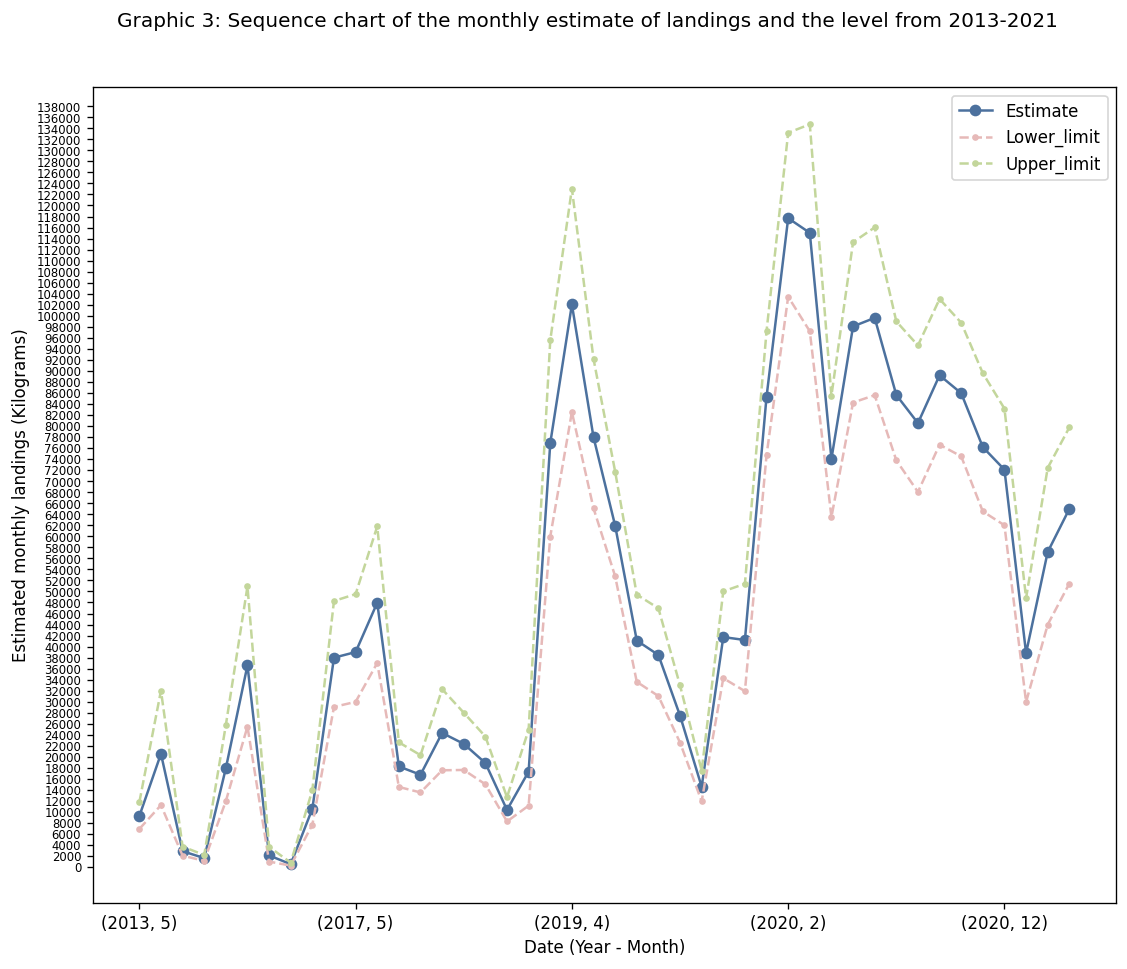

In [5]:
#Prepared the data
Serie1=df.groupby(['Year_Label','Month_ID'],sort=True).Estimate.sum()
Serie2=df.groupby(['Year_Label','Month_ID'],sort=True).Lower_limit.sum()
Serie3=df.groupby(['Year_Label','Month_ID'],sort=True).Upper_limit.sum()
Se1=Serie1[2:46]
Se2=Serie2[2:46]
Se3=Serie3[2:46]
#Graphic parameters
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
Se1.plot(color='#4c719e', linestyle='-', marker='o')
Se2.plot(color='#E6B9B8', linestyle='--', marker='.')
Se3.plot(color='#C3D69B', linestyle='--', marker='.')
plt.suptitle('Graphic 3: Sequence chart of the monthly estimate of landings and the level from 2013-2021', y=0.95)
plt.yticks(range(0,140000,2000), size='x-small')
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.ylabel(u'Estimated monthly landings (Kilograms)')  # Label y-axis
plt.legend(loc='upper right', ncol=1)
plt.show()
#savefig("Graphic3.png", dpi=300)  # Save the figure on png and 300 DPI

With the intention of comparing the annual patterns side it was perfomer the agrupations of estimated landings by year and motnh of the registers.

In the temporality graph of the monthly estimate of landings it can be identified that 2020 and surely 2021 are atypical years, this due to the biosafety regulatory measures implemented since March 2020 and the alert made by the World Health Organization by the emergence of the pandemic by COVID 19, these biosecurity measures had a direct impact on the activity of artisanal fishing, the fish collection centers and local markets. 

However, the monthly histories of the years 2019, 2017, and 2013 show considerable increases in the estimates during June, for 2017 and 2019 were also estimated during April, while after June there were falls in these estimates with a small increase during 2017. These occilations indicate a temporality that is linked to the dynamics of artisanal fishing, the fish market, the public and environmental conditions of the fishing sites in the Colombian Pacific.

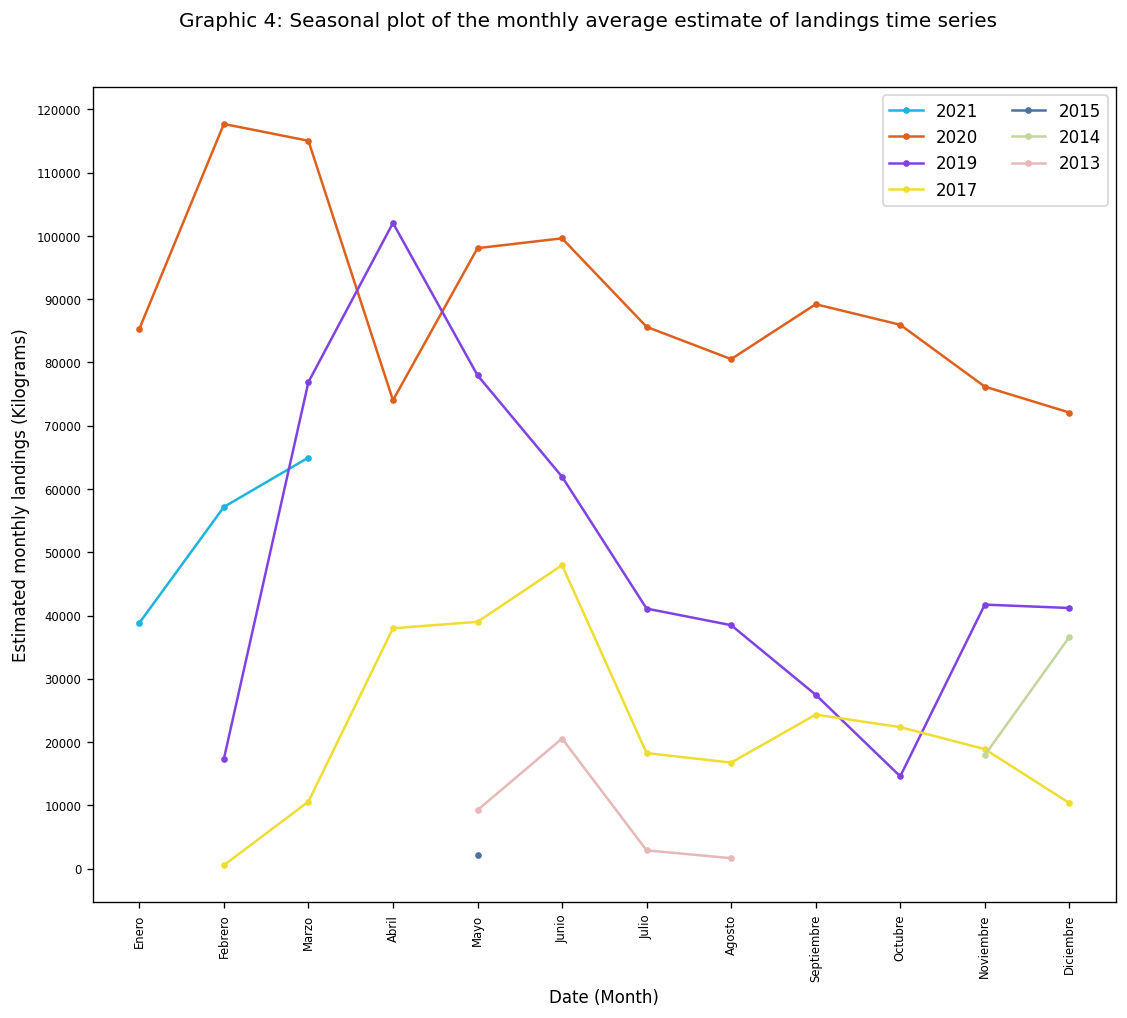

In [6]:
#Prepared the data
dfa=df[['Year_ID','Year_Label','Month_ID','Month_Label2','Date_Code','Date_Label1','Estimate','Lower_limit','Upper_limit']]
df1=dfa.reset_index()
s_Ed=df1.groupby(['Year_ID','Year_Label','Month_ID','Month_Label2','Date_Label2']).Estimate.sum()
#s_Ed.head()
#s_Ed.index
#s_Ed.values
#s_Ed.describe()
#s_Ed.iloc[0]
#s_Ed.loc[1]
#s_Ed[1]
#print(Eym)
df_Ed=s_Ed.reset_index()
#df_Ed.head()
#df_Ed.tail()
#print(df_Ed)
df_Edo=df_Ed.sort_values(['Year_Label', 'Month_ID'], ascending=True)
#print(EO)
Serie2012=df_Edo[0:2]
Serie2013=df_Edo[2:6]
Serie2014=df_Edo[6:8]
Serie2015=df_Edo[8:9]
Serie2017=df_Edo[9:20]
Serie2019=df_Edo[20:31]
Serie2020=df_Edo[31:43]
Serie2021=df_Edo[43:46]
#Graphic display of the Time Series by year 
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
#plt.figure(figsize=(783,862), dpi=120)
plt.plot(Serie2021.Month_Label2, Serie2021.Estimate, color='#1db4de', linestyle='-', marker='.', label='2021')
plt.plot(Serie2020.Month_Label2, Serie2020.Estimate, color='#de601d', linestyle='-', marker='.', label='2020')
plt.plot(Serie2019.Month_Label2, Serie2019.Estimate, color='#8042e3', linestyle='-', marker='.', label='2019')
plt.plot(Serie2017.Month_Label2, Serie2017.Estimate, color='#f0dd32', linestyle='-', marker='.', label='2017')
plt.plot(Serie2015.Month_Label2, Serie2015.Estimate, color='#4c719e', linestyle='-', marker='.', label='2015')
plt.plot(Serie2014.Month_Label2, Serie2014.Estimate, color='#C3D69B', linestyle='-', marker='.', label='2014')
plt.plot(Serie2013.Month_Label2, Serie2013.Estimate, color='#E6B9B8', linestyle='-', marker='.', label='2013')
plt.suptitle('Graphic 4: Seasonal plot of the monthly average estimate of landings time series',y=0.95)
plt.xticks(range(12), size='x-small', rotation = 90) # Fix to clearly display the date labels (Month - Year), and rotated 90º
plt.yticks(range(0,125000,10000),size='x-small')
plt.xlabel('Date (Month)')  # Label x-axis
plt.ylabel(u'Estimated monthly landings (Kilograms)')  # Label y-axis
plt.legend( loc='upper right', ncol=2)
plt.show()
#savefig("Graphic4.png", dpi=300)  # Save the figure on png and 300 DPI

With the visualization of the data, it is possible to identify some groups of information that are selected for the design, test and assembly of a predictive model.

In the temporality graph of the monthly estimate of landings it can be identified that 2020 and surely 2021 are atypical years, this due to the biosafety regulatory measures implemented since March 2020 and the alert made by the World Health Organization about the pandemic by COVID 19, these biosecurity measures had a direct impact on the activity of artisanal fishing, the fish collection centers and local markets.

We refer to the data whose records date from the years 2017, 2019, and 2020, the years 2012 are not taken into account for their estimates with values far removed from the rest of the estimated values in the other years, nor are data from the records of the years included. of 2013, 2014, 2015, and 2021 because they are records in some specific months but they are not complete.

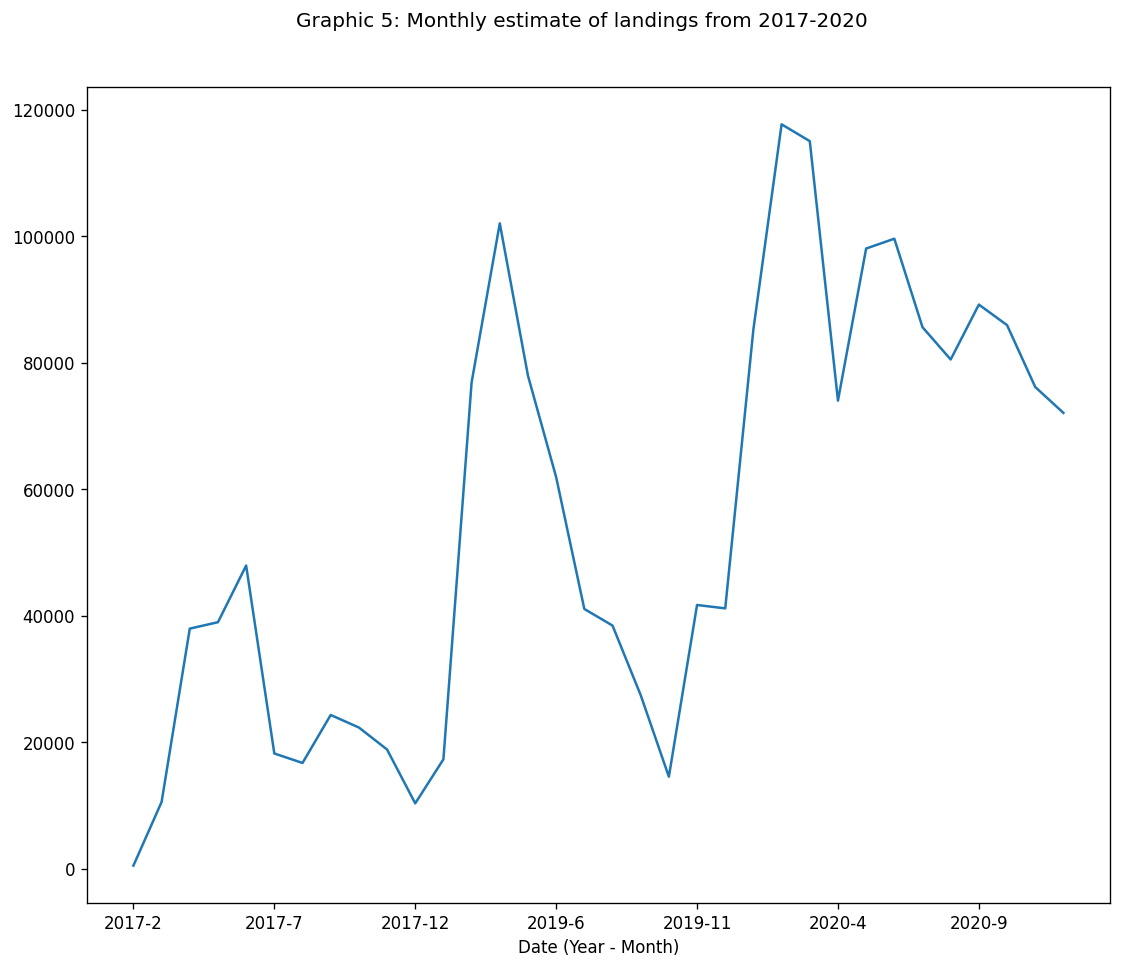

In [7]:
#Prepared the data
df_f=df_Ed.set_index('Date_Label2')
Year_selected = [2017,2019,2020]
df_se=df_f[df_f.Year_Label.isin(Year_selected)]
s_s=df_se.Estimate
#df_s.head()
#df_s.tail()
s_s.plot()
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.suptitle('Graphic 5: Monthly estimate of landings from 2017-2020',y=0.95)

plt.show()
#savefig("Graphic5.png", dpi=300)  # Save the figure on png and 300 DPI

###**Classical decomposition of the time series**
In this work it is considering the series as an additive or multiplicative combination of the base level  base level, trend, seasonal index and the residual. In the previous process, it was possible to identify that there is no clear trend but there is a temporality due to occilations during the years 2019 and 2017.

Time series decomposition is a technique that splits a time series into several components, each representing an underlying pattern category, trend, seasonality, and noise. To performed the descomposition is used Pythons statsmodels function seasonal_decompose.

In the decomposition analysis of the selected time series, the trend, seasonality and residual are shown. In both the multiplicative and additive models, it is possible to observe a positive trend towards an increase in the estimated number of landings as time passes. You can also observe a seasonality with a biannual frequency (graphic 6 and 7).
It is also important to mention that occillations are identified in the residual, this indicates that the series has changes due to random or temporary events caused by sporadic and unpredictable factors that are not related to trend or seasonality.


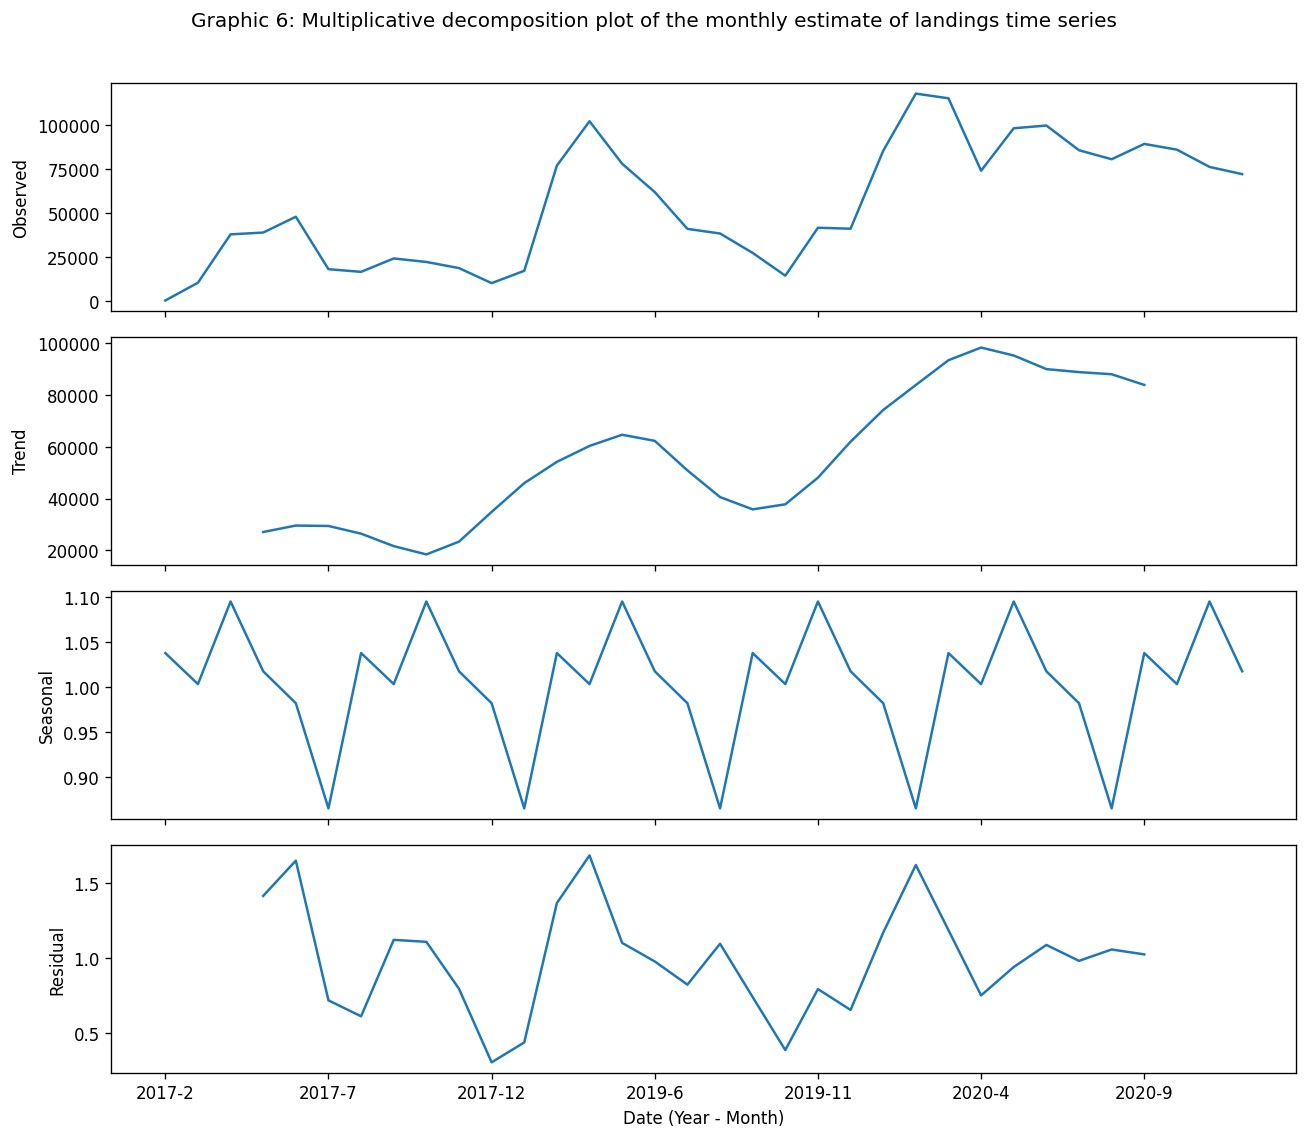

In [8]:
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error
# Multiplicative Decomposition 
result_mult=seasonal_decompose(s_s, model='multiplicable', freq=6)
result_mult.plot()
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.suptitle('Graphic 6: Multiplicative decomposition plot of the monthly estimate of landings time series', y=1.05)
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
plt.show() 
#savefig("Graphic7.png", dpi=300)  # Save the figure on png and 300 DPI
#Seasonality chart
#result_mult.seasonal.plot()
#plt.xlabel('Date (Year - Month)')  # Label x-axis
#plt.suptitle('Seasonality in the multiplative decomposition plot of the monthly estimate of landings time series', y=0.95)
#plt.figure(figsize=(783,862), dpi=120)
#plt.show()
#Tendency chart
#result_mult.trend.plot()
#plt.xlabel('Date (Year - Month)')  # Label x-axis
#plt.suptitle('Tendency in the multiplative decomposition plot of the monthly estimate of landings time series', y=0.95)
#plt.figure(figsize=(783,862), dpi=120)
#plt.show()
#savefig("Graphic6.png", dpi=300)  # Save the figure on png and 300 DPI

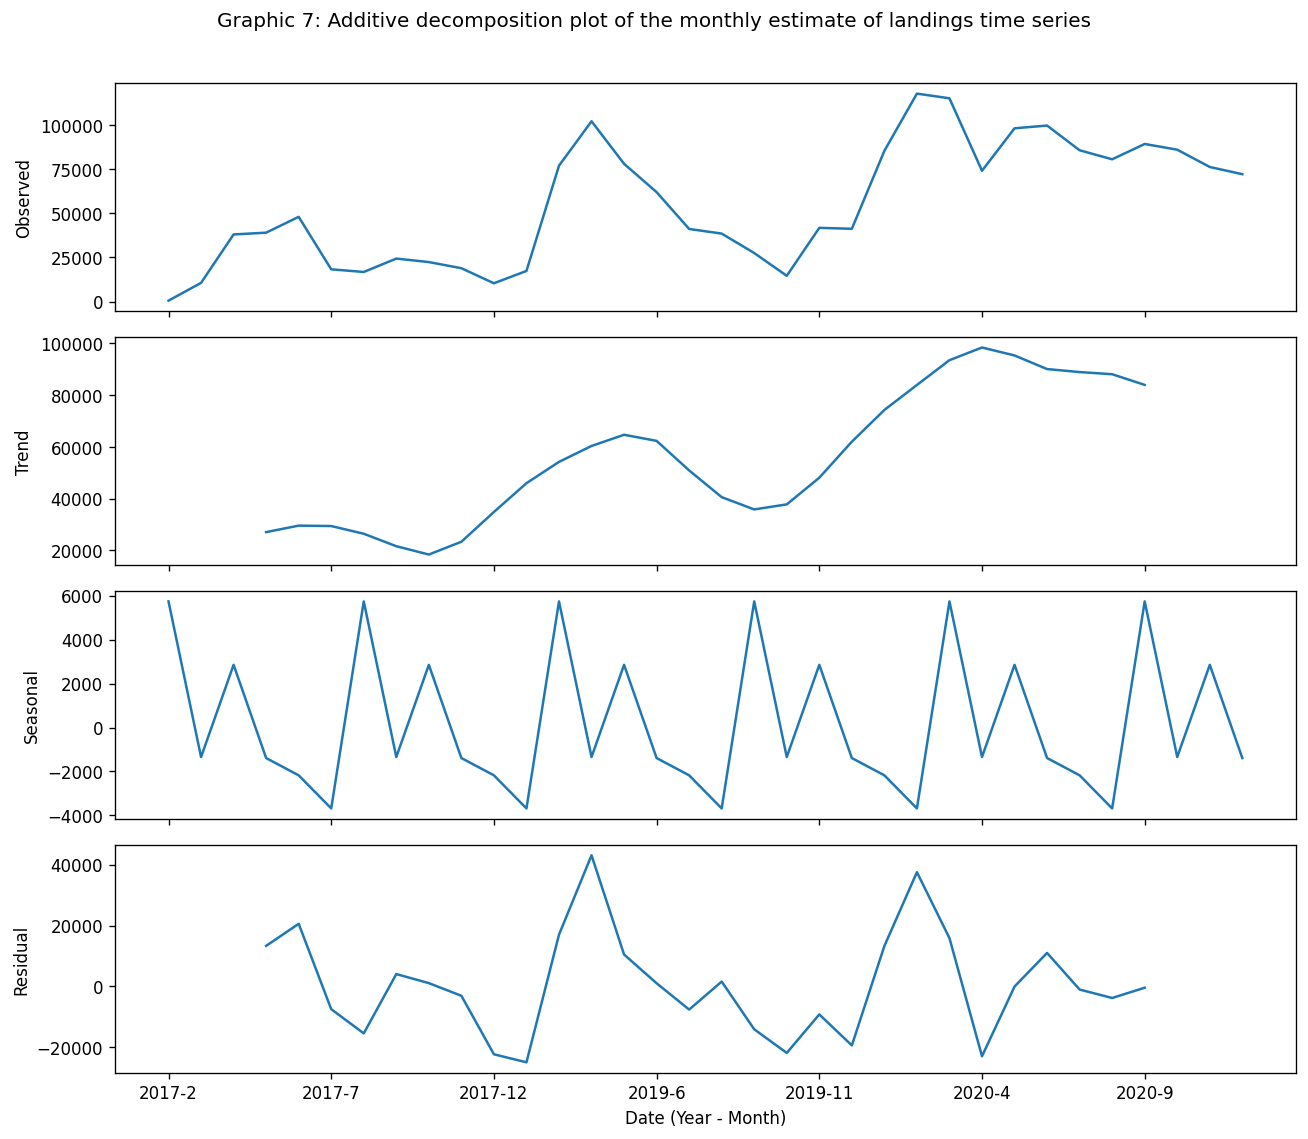

In [9]:
#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
# Additive Decomposition
result_add = seasonal_decompose(s_s, model='additive', freq=6)
result_add.plot()
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.suptitle('Graphic 7: Additive decomposition plot of the monthly estimate of landings time series', y=1.05)
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
plt.show() 
#savefig("Graphic8.png", dpi=300)  # Save the figure on png and 300 DPI
#Tendency chart
#result_add.trend.plot()
#plt.xlabel('Date (Year - Month)')  # Label x-axis
#plt.suptitle('Tendency in the additive decomposition plot of the monthly estimate of landings time series',y=0.95)
#plt.figure(figsize=(783,862), dpi=120)
#plt.show()
#savefig("Graphic11.png", dpi=300)  # Save the figure on png and 300 DPI 
#Seasonality chart
#result_add.seasonal.plot()
#plt.xlabel('Date (Year - Month)')  # Label x-axis
#plt.suptitle('Seasonality in the additive decomposition plot of the monthly estimate of landings time series',y=0.95)
#plt.figure(figsize=(783,862), dpi=120)
#plt.show()
#savefig("Graphic7.png", dpi=300)  # Save the figure on png and 300 DPI

###**Augmented Dickey-Fuller test**
To perform forecasting using the ARIMA model, is required a stationary time series. Stationary time series is a time series that is unaffected by these four components shown in the decomposition of the time series. If the data is non-stationary the predictions from the ARIMA model are not so accurate, so if the data is not stationary, are two options: make the data stationary or use the SARIMAX model, wich is the model proposed for this research.

It can be said that a series is stationary when its mean and variance are not a function of time, that is, they are constant in time.
Stationarity is important because most statistical methods for performing analysis and predictions are based on the assumption that the statistical properties of the series (mean, variance, correlation, etc.) are constant over time.

To know about the time series stationarity, it is perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure (Brownlee, 2016).

In other words, the test seeks to observe the p-value, ADF value, and the critical values, if the p-value is less than 0.05, the critical values are close and the first value is less than the second and ideally is the value of the test statistic (ADF), it can be stated that the series is stationary 
(Arzamendia, 2019).

The Augmented Dickey-Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the null hypothesis that there is a unit root for a certain level of confidence.

In this case the p-value is greater than 0.05 and the ADF value is far from the critical values 1%, 5%, and 10%, therefore it can be stated that the time series selected for the model for the predictive model is non-sationary.

When observing the results of the Dickey-Fuller tests, it can be observed that the p-values are: the p-value of the original series (without decomposing) has a p-value greater than 0.05; in the time series with trend and without seasonality, the p-value in the additive and multiplicative models is greater than 0.05; in the time series with seasonality and without trend, the p-value is zero in both models (additive and multiplicative); finally by observing the residuals, it is possible to identify that in both models the p-value is less than 0.05, although the multiplicative model has the lowest of the p-values. In the additive model, the closest values ​​are found, the first critical value being very close to the ADF value.

In [10]:
#Dickey–Fuller test (Augmented Dickey-Fuller ADF)
#Test
dftest = adfuller(s_s, autolag = 'AIC')
print('Dickey–Fuller test for selected time series')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
#Trend
#Dickey–Fuller test for multiplicative model
#Test
dftest = adfuller(result_mult.trend.dropna(), autolag = 'AIC')
print('Dickey–Fuller test for trend in multiplicative model')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
#Dickey–Fuller test for additive model
#Test
dftest = adfuller(result_add.trend.dropna(), autolag = 'AIC')
print('Dickey–Fuller test for trend in additive model')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
#Seasonal
#Dickey–Fuller test for multiplicative model
#Test
dftest = adfuller(result_mult.seasonal.dropna(), autolag = 'AIC')
print('Dickey–Fuller test for seasonal in multiplicative model')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
#Dickey–Fuller test for additive model
#Test
dftest = adfuller(result_add.seasonal.dropna(), autolag = 'AIC')
print('Dickey–Fuller test for seasonal in additive model')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
#Residual 
#Dickey–Fuller test for multiplicative model
#Delet Nan
nrmultresid = [x for x in result_mult.resid if pd.isnull(x) == False and x != 'nan']
#Test
dftest = adfuller(nrmultresid, autolag = 'AIC')
print('Dickey–Fuller test for residual in multiplicative model')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
#Dickey–Fuller test for additive model
#Delet Nan
nraddresid = [x for x in result_add.resid if pd.isnull(x) == False and x != 'nan']
#Test
dftest = adfuller(nraddresid, autolag = 'AIC')
print('Dickey–Fuller test  for residual in additive model')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

Dickey–Fuller test for selected time series
1. ADF :  -2.492671985468535
2. P-Value :  0.11726750617709303
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 32
5. Critical Values :
Dickey–Fuller test for trend in multiplicative model
1. ADF :  -0.6393458655961507
2. P-Value :  0.8618413683096532
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 23
5. Critical Values :
	 1% :  -3.7529275211638033
	 5% :  -2.998499866852963
	 10% :  -2.6389669754253307
Dickey–Fuller test for trend in additive model
1. ADF :  -0.6393458655961507
2. P-Value :  0.8618413683096532
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 23
5. Critical Values :
	 1% :  -3.7529275211638033
	 5% :  -2.998499866852963
	 10% :  -2.6389669754253307
Dickey–Fuller test for seasonal in multiplicative model
1. ADF :  -4482679495353821.0
2. P-Value :  0.0
3. Num Of Lags :  10

###**Time series stationary with differencing methods**
To seasonalize a time series the differencing is performed with the rolling mean differencing methods.

In the graphics 8 and 9, the values ​​on the x-axis represent the lags, which in this case they go up to 40 since that is what was established. The numbers to the left on the vertical axis represent the possible values ​​for the autocorrelation coefficient. The correlation can only take values ​​between -1 and 1.

The lines on the graph represent the autocorrelation between the time series and a lagged version of itself. The first line indicates the lagged autocorrelation for 1 period of time, the second line 10 represents the autocorrelation for two periods ago, and so on. The first line is one because the correlation between a value and itself will always be one.

The blue area around the x-axis represents the significance of the autocorrelation values. That is, it measures whether they are significantly different from zero, which suggests the existence of autocorrelation for that specific delay. If the coefficients are significant, it is an indicator of the time dependency on the data.

The ACF function is used to investigate how many lags are required in the moving average model. And to investigate if the residuals are white noise, that is, if the correlations are not significant for the residuals.

The Autocorrelation (ACF) tells how many Moving Averages (MA) are required to remove any autocorrelation in the stationarized series. The MA term is technically, the error of the lagged forecast.

In the graphic 8, the ACF for the original serie (selected timne series) shows that the first and second lag are significant. In the first differencing, the zero lag is quite significant since it is well above the significance line, but the lags 1 and 2 turns out not to be significants and do not cross the significance limit (blue region).

Besides the selected time series reaches stationarity with one order of differencing. But the autocorrelation plot for the first differencing is not significant, and the second differencing shows that the lag goes into the far negative zone pretty fast, which suggests that the series might have been over differenced.


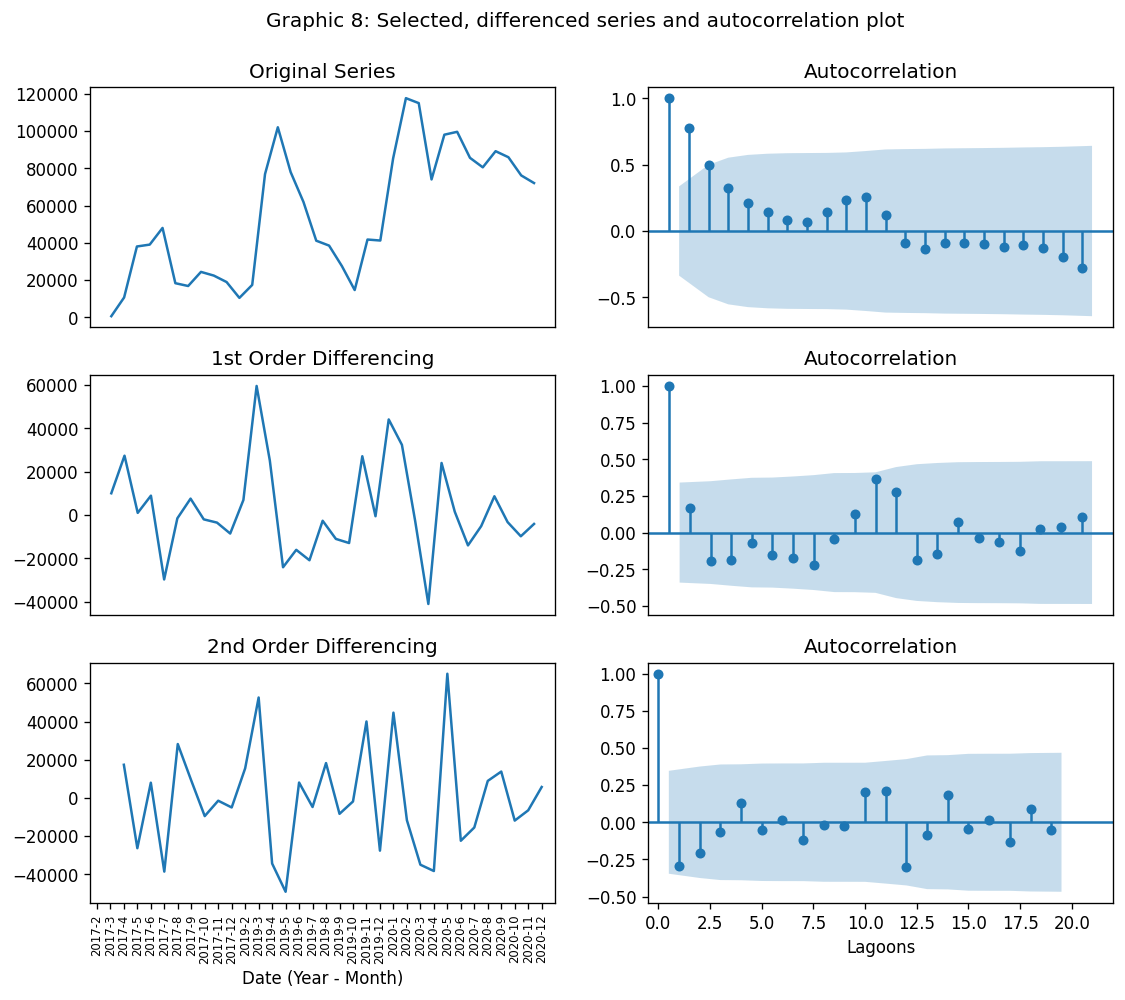

In [11]:
df_a=s_s.reset_index()
df_b=df_a.set_index('Date_Label2')
#Difference the series and autocorrelation plot
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=False)              
plt.suptitle('Graphic 8: Selected, differenced series and autocorrelation plot', y=0.95)
# Original Series
axes[0, 0].plot(df_b.Estimate); axes[0, 0].set_title('Original Series')
plot_acf(df_b, lags=21, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(df_b.Estimate.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_b.Estimate.diff().dropna(), lags=20, ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(df_b.Estimate.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_b.Estimate.diff().diff().dropna(), lags=19, ax=axes[2, 1])
#Fix axes
plt.sca(axes[0, 0])
plt.xticks([])
plt.sca(axes[0, 1])
plt.xticks([])
plt.sca(axes[1, 0])
plt.xticks([])
plt.sca(axes[1, 1])
plt.xticks([])
plt.sca(axes[2, 0])
plt.xticks(range(34), df_b.index, size='x-small', rotation = 90)
plt.xlim([-0.5, 34])
plt.xlabel('Date (Year - Month)')
plt.sca(axes[2, 1])
plt.xlim([-0.5, 22])
plt.xlabel('Lagoons')
plt.show()
#savefig("Graphic8.png", dpi=300)  # Save the figure on png and 300 DPI

The partial autocorrelation (PACF) allows to analyze the correlation between the series and its lag, after excluding the contributions from the intermediate lags.  PACF conveys the correlation between a lag and the series, and allows to know if one lag is needed in the Autoregressive (AR) term in the model ARIMA. In other words, the PACF function is used to investigate how many lags (delays) are required in the autoregressive model.

Autocorrelation measures the similarity between a time series and earlier versions of itself. However, the coefficients also capture effects of the previous moments in an indirect way. By indirect we mean all the other channels through which past data affects current data. If we want to determine only the direct relationship between the time series and its lagged version, we need to calculate the partial autocorrelation.

In the graphic 9, the PACF first lag is quite significant since it is well above the significance line. Lags 1 and 2 turns out not to be significants and do not cross the significance limit (blue region).


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



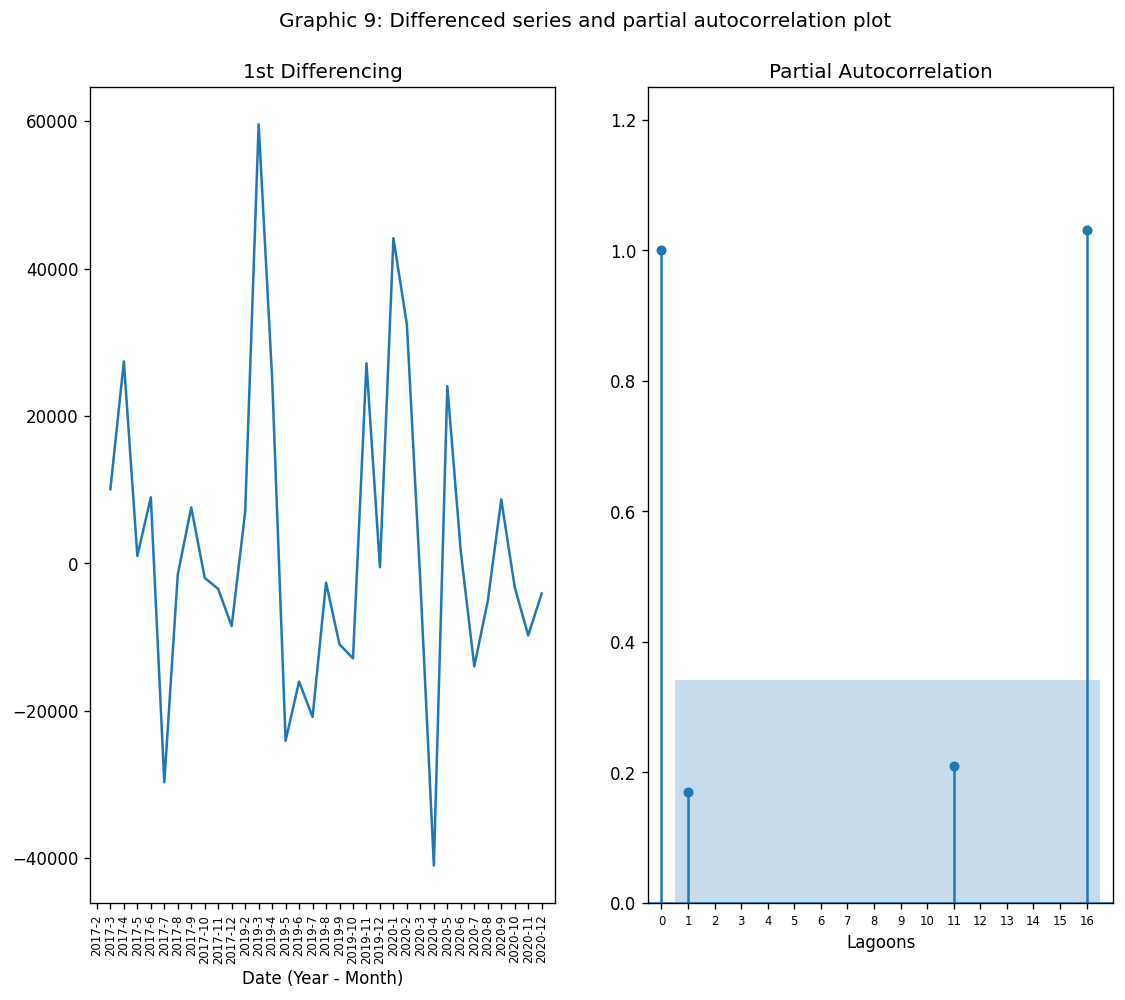

In [12]:
#Partial Autocorrelation (PACF) plot
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=False)
plt.suptitle('Graphic 9: Differenced series and partial autocorrelation plot', y=0.95)
axes[0].plot(df_b.Estimate.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.25))
plot_pacf(df_b.Estimate.diff().dropna(), ax=axes[1])
plt.sca(axes[0])
plt.xticks(range(34), df_b.index, size='x-small', rotation = 90)
plt.xlim([-0.5, 34])
plt.xlabel('Date (Year - Month)')
plt.sca(axes[1])
plt.xticks(range(17),  size='x-small')
plt.xlim([-0.5, 17])
plt.xlabel('Lagoons')
plt.show()
#savefig("Graphic9.png", dpi=300)  # Save the figure on png and 300 DPI

###**The rolling mean differencing methods**
A rolling analysis of a time series model is often used to assess the model’s stability over time. When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time. 
However, the results for the selected series has p-values greater than 0.05 on the ADFuller test. 

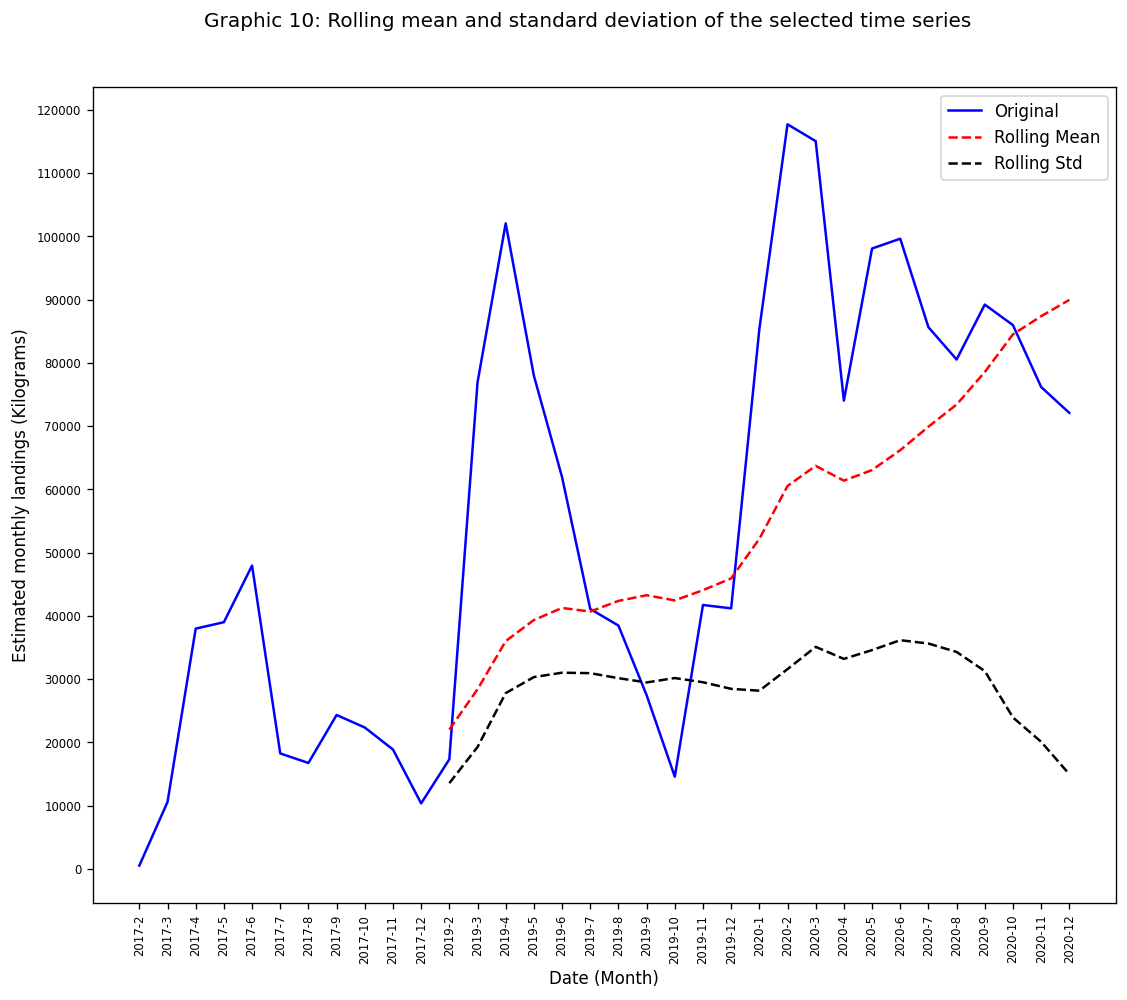

Dickey–Fuller test for the time series selected
1. ADF :  -2.492671985468535
2. P-Value :  0.11726750617709303
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 32
5. Critical Values :
	 1% :  -3.653519805908203
	 5% :  -2.9572185644531253
	 10% :  -2.6175881640625
Dickey–Fuller test for the rolling mean
1. ADF :  1.9173229801366032
2. P-Value :  0.9985553852976222
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 13
5. Critical Values :
	 1% :  -4.068853732362312
	 5% :  -3.1271488757396453
	 10% :  -2.7017297633136095
Dickey–Fuller test for the rolling standard
1. ADF :  1.9173229801366032
2. P-Value :  0.9985553852976222
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 13
5. Critical Values :
	 1% :  -4.068853732362312
	 5% :  -3.1271488757396453
	 10% :  -2.7017297633136095


In [13]:
#def test_stationarity(timeseries):
#df_t=df_s.reset_index()  
# Determining rolling statistics
rolmean = s_s.rolling(12).mean()
rolstd = s_s.rolling(12).std()
# Plot rolling statistics:
orig = plt.plot(s_s, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', linestyle='--', label='Rolling Mean')
std = plt.plot(rolstd, color='black', linestyle='--', label = 'Rolling Std')
plt.suptitle('Graphic 10: Rolling mean and standard deviation of the selected time series',y=0.95)
plt.xticks(range(34), size='x-small', rotation = 90) # Fix to clearly display the date labels (Month - Year), and rotated 90º
plt.yticks(range(0,125000,10000),size='x-small')
plt.xlabel('Date (Month)')  # Label x-axis
plt.ylabel(u'Estimated monthly landings (Kilograms)')  # Label y-axis
plt.legend( loc='upper right', ncol=1)
plt.show()
#plt.show(block=False)
#savefig("Graphic8.png", dpi=300)  # Save the figure on png and 300 DPI
#Dickey–Fuller test
#Dickey–Fuller test for the selected time series
dftest = adfuller(s_s, autolag = 'AIC')
print('Dickey–Fuller test for the time series selected')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
#Dickey–Fuller test for the rolling mean
dftest = adfuller(rolmean.dropna(), autolag = 'AIC')
print('Dickey–Fuller test for the rolling mean')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
#Dickey–Fuller test for the rolling std 
dftest = adfuller(rolmean.dropna(), autolag = 'AIC')
print('Dickey–Fuller test for the rolling standard')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
#savefig("Graphic10.png", dpi=300)  # Save the figure on png and 300 DPI

##**Model design**
###**Time Cross validation**
In this research is performed the out-of-time cross-validation, it was taken few steps back in time and forecast into the future to as many steps to took back. Then it was compared the forecast against the actuals (Prabhakaran, 2021).

To do out-of-time cross-validation, it was created the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 86:14 ratio or a reasonable proportion based on time frequency of series 

The order sequence of the time series was intact in order to use it for forecasting. So it is not performed a randomly sampling of the training data.

For this research is used the AutoRegresive Integrated Moving Average (ARIMA) model, its name derives from three components: AR (Autoregressive), I (Integrated), and MA (Moving Average).

Note that the summary of the ARIMA is performed the AR that operate under the premise that past values have an effect on current values. AR models are commonly used in analyzing nature, economics, and other time-varying processes. As long as the assumption holds, we can build a linear regression model that attempts to predict value of a dependent variable today, given the values it had on previous days (Maklin, 2019).

Observations: 34
Training Observations: 29
Testing Observations: 5


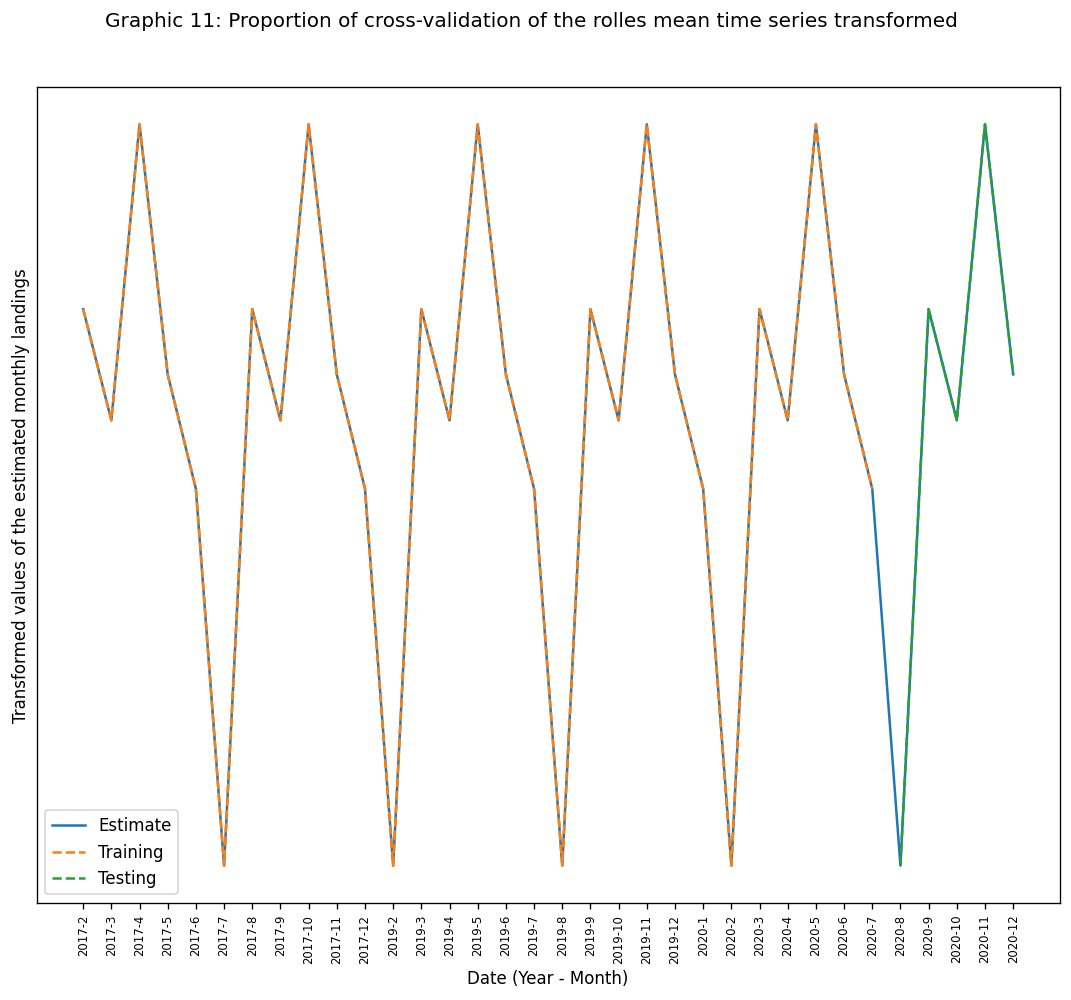

In [14]:
#Cross validation proportions 86/14
s_rm=result_mult.seasonal.dropna()
train_size = int(len(s_rm)*0.86)
train, test = s_rm[0:(train_size)], s_rm[train_size:int(len(s_rm))]
print('Observations: %d' % (len(s_rm)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
#Plot
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
plt.plot(s_rm.index, s_rm, linestyle='-', label='Estimate')
plt.plot(train.index, train, linestyle='--', label='Training')
plt.plot(test.index, test, linestyle='--' , label='Testing')
plt.suptitle('Graphic 11: Proportion of cross-validation of the rolles mean time series transformed',y=0.95)
plt.xticks(range(0,34,1), size='x-small', rotation = 90) # Fix to clearly display the date labels (Month - Year), and rotated 90º
plt.yticks(range(1),size='x-small')
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.ylabel(u'Transformed values of the estimated monthly landings')  # Label y-axis
plt.legend( loc='best', ncol=1)
plt.show()
#savefig("Graphic11.png", dpi=300)  # Save the figure on png and 300 DPI

###**Autoregressive Integrated Moving Average**
In statistics and in time series analysis, an  autoregressive integrated moving average model (ARIMA) is an update of ARMA (autoregressive moving average) (Verma, 2021). The ARMA consists of mainly two components, the autoregressive and moving average; the ARIMA consists of an integrated moving average of autoregressive time series.  ARIMA model is useful in the cases where the time series is non-stationary. And the differencing is required to make the time series  (Verma, 2021).

By making the model more complex according to the analysis of the ACF and PACF residuals, a prediction fitted to the trained data is not obtained and the results are not satisfactory. In this case the best model so far is ARIMA (1,1,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning:

invalid value encountered in sqrt



                             ARIMA Model Results                              
Dep. Variable:             D.Estimate   No. Observations:                   28
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  34.840
Method:                       css-mle   S.D. of innovations              0.065
Date:                Mon, 06 Sep 2021   AIC                            -61.680
Time:                        15:55:15   BIC                            -56.351
Sample:                             1   HQIC                           -60.051
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0020      0.012     -0.162      0.872      -0.026       0.022
ar.L1.D.Estimate    -1.0000        nan        nan        nan         nan         nan
ma.L1.D.Estimate     0.9999 

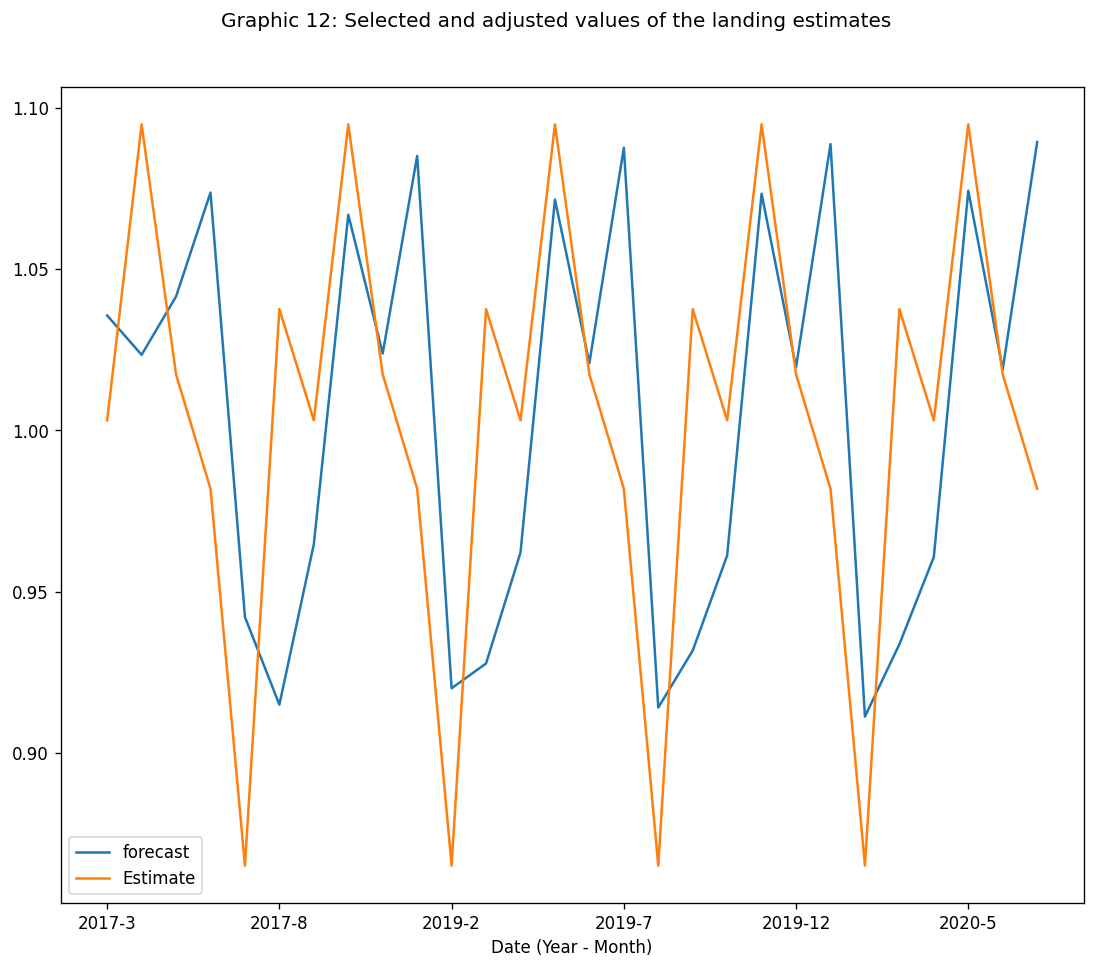

In [15]:
#p is the order of the AR term
#q is the order of the MA term
#d is the number of differencing required to make the time series stationary
# Model buil
#If you need information about the ARIMA order check https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html
model = ARIMA(train, order=(1,1,1))  
#fitted = model.fit(disp=0)  
fitted = model.fit()
print(fitted.summary())
# Actual vs Fitted
fitted.plot_predict(dynamic=False)
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
plt.suptitle('Graphic 12: Selected and adjusted values of the landing estimates',y=0.95)
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.show()
#savefig("Graphic12.png", dpi=300)  # Save the figure on png and 300 DPI

In the case of this selected series, seasonality is repeated every semester (6 months).

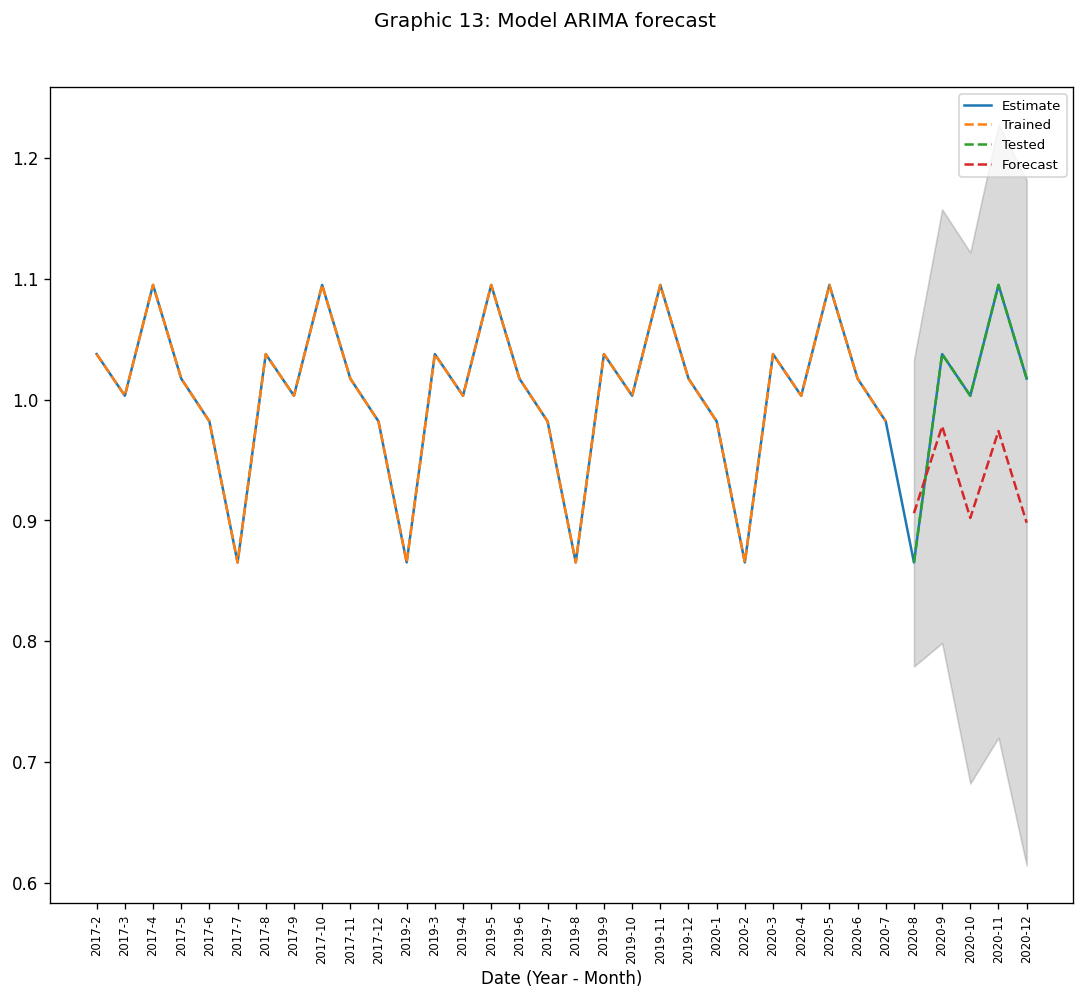

In [16]:
#Forecast
fc, se, conf = fitted.forecast(5, alpha=0.05)  # 95% conf
#Pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
plt.plot(s_rm, label='Estimate')
plt.plot(train, label='Trained', linestyle='--')
plt.plot(test, label='Tested', linestyle='--')
plt.plot(fc_series, label='Forecast', linestyle='--')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.legend(loc='upper right', fontsize=8)
plt.xticks(range(34), size='x-small', rotation = 90) # Fix to clearly display the date labels (Month - Year), and rotated 90º
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.suptitle('Graphic 13: Model ARIMA forecast',y=0.95)
plt.show()
#savefig("Graphic13.png", dpi=300)  # Save the figure on png and 300 DPI
#See the second model
#Complexize the model according to the analysis of the ACF and PACF residues
#ACF
#df_a=s_rm.reset_index()
#df_b=df_a.set_index('Date_Label2')
#Difference the series and autocorrelation plot
#plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
#fig, axes = plt.subplots(3, 2, sharex=False)              
#plt.suptitle('Differenced series and autocorrelation plot', y=0.95)
# Original Series
#axes[0, 0].plot(df_b.Estimate); axes[0, 0].set_title('Original Series')
#plot_acf(df_b, lags=21, ax=axes[0, 1])
# 1st Differencing
#axes[1, 0].plot(df_b.Estimate.diff()); axes[1, 0].set_title('1st Order Differencing')
#plot_acf(df_b.Estimate.diff().dropna(), lags=20, ax=axes[1, 1])
# 2nd Differencing
#axes[2, 0].plot(df_b.Estimate.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
#plot_acf(df_b.Estimate.diff().diff().dropna(), lags=19, ax=axes[2, 1])
#Fix axes
#plt.sca(axes[0, 0])
#plt.xticks([])
#plt.sca(axes[0, 1])
#plt.xticks([])
#plt.sca(axes[1, 0])
#plt.xticks([])
#plt.sca(axes[1, 1])
#plt.xticks([])
#plt.sca(axes[2, 0])
#plt.xticks(range(34), df_b.index, size='x-small', rotation = 90)
#plt.xlim([-0.5, 34])
#plt.xlabel('Date (Year - Month)')
#plt.sca(axes[2, 1])
#plt.xlim([-0.5, 22])
#plt.xlabel('Lagoons')
#plt.show()
#savefig("GraphicACFSecondModelARIMA.png", dpi=300)  # Save the figure on png and 300 DPI
#Partial Autocorrelation (PACF) plot
#PACF plot of 1st differenced series
#plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
#fig, axes = plt.subplots(1, 2, sharex=False)
#plt.suptitle('Differenced series and partial autocorrelation plot', y=0.95)
#axes[0].plot(df_b.Estimate.diff()); axes[0].set_title('1st Differencing')
#axes[1].set(ylim=(0,1.25))
#plot_pacf(df_b.Estimate.diff().dropna(), ax=axes[1])
#plt.sca(axes[0])
#plt.xticks(range(34), df_b.index, size='x-small', rotation = 90)
#plt.xlim([-0.5, 34])
#plt.xlabel('Date (Year - Month)')
#plt.sca(axes[1])
#plt.xticks(range(17),  size='x-small')
#plt.xlim([-0.5, 17])
#plt.xlabel('Lagoons')
#plt.show()
#savefig("GraphicPAFSecondModelARIMA.png", dpi=300)  # Save the figure on png and 300 DPI
#p is the order of the AR term
#q is the order of the MA term
#d is the number of differencing required to make the time series stationary
# Model buil
#model2 = ARIMA(train, order=(0,0,0))  
#fitted = model.fit(disp=0)  
#fitted2 = model2.fit()
#print(fitted2.summary())
# Actual vs Fitted
#fitted2.plot_predict(dynamic=False)
#plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
#plt.suptitle('Graphic 14: Graph of the selected and adjusted values of the landing estimates',y=0.95)
#plt.xlabel('Date (Year - Month)')  # Label x-axis
#plt.show()
#savefig("GraphicARIMA2.png", dpi=300)  # Save the figure on png and 300 DPI
#Forecasting
#fc, se, conf = fitted2.forecast(5, alpha=0.05)  # 95% conf
#Pandas series
#fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
#plt.figure(figsize=(11,9), dpi=120)
#plt.plot(s_rm, label='Estimate')
#plt.plot(train, label='Trained', linestyle='--')
#plt.plot(test, label='Tested', linestyle='--')
#plt.plot(fc_series, label='Forecast', linestyle='--')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
#plt.legend(loc='upper right', fontsize=8)
#plt.xticks(range(34), size='x-small', rotation = 90) # Fix to clearly display the date labels (Month - Year), and rotated 90º
#plt.xlabel('Date (Year - Month)')  # Label x-axis
#plt.suptitle('Graphic 15: Model ARIMA forecast',y=0.95)
#plt.show()
#savefig("Graphic15.png", dpi=300)  # Save the figure on png and 300 DPI 

###**Seasonal auto-regressive integrated moving average with exogenous factors**
The seasonal auto-regressive integrated moving average with exogenous factors (SARIMAX) is an updated version of the ARIMA model. ARIMA includes an autoregressive integrated moving average, while SARIMAX includes seasonal effects and exogenous factors with the autoregressive and moving average component in the model. Therefore, SARIMAX is a seasonal equivalent model like SARIMA and Auto ARIMA.

In the SARIMAX models parameter, we need to provide two kinds of orders. The first one is similar to the ARIMA model (p, d, q), and the other is to specify the effect of the seasonality; we call this order a seasonal order in which we are required to provide four numbers (Seasonal AR specification, Seasonal Integration order, Seasonal MA, Seasonal periodicity)

The SARIMAX model result is on the graphic 11, it is possible to see that the forecasting line is almost lying on the given values for this model.

In [18]:
print('Observations: %d' % (len(s_rm)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
#Build SARIMAX Model
#Fitting the model into time series.
#x=train2
#x.reset_index()
modelS=sm.tsa.statespace.SARIMAX(train, order=(1, 1, 1),seasonal_order=(1,1,1,6))
fittedS=modelS.fit()
print(fittedS.summary())

Observations: 34
Training Observations: 29
Testing Observations: 5
                                 Statespace Model Results                                
Dep. Variable:                          Estimate   No. Observations:                   29
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                 252.944
Date:                           Mon, 06 Sep 2021   AIC                           -495.888
Time:                                   15:55:50   BIC                           -490.433
Sample:                                        0   HQIC                          -494.603
                                            - 29                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py:2223: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py:2060: RuntimeWarning:

invalid value encountered in true_divide



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



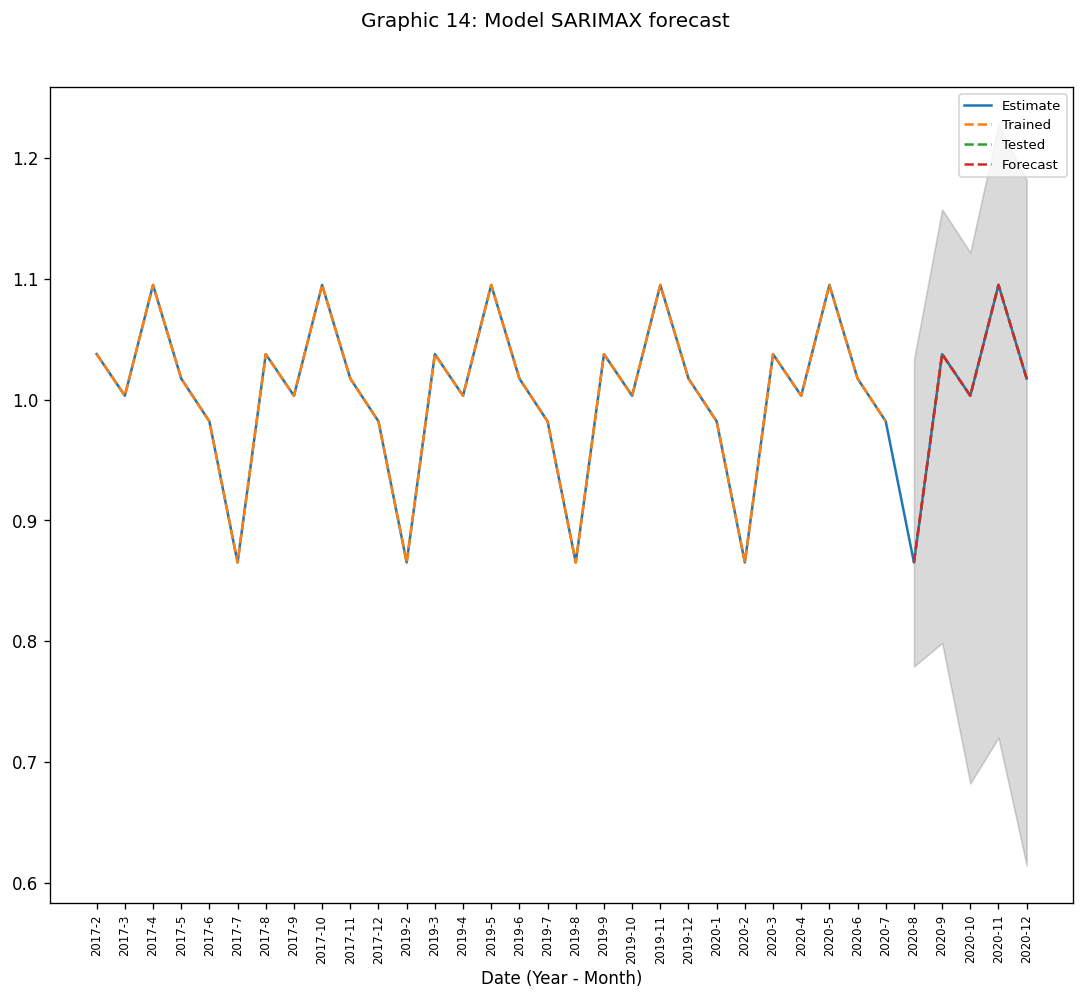

In [26]:
#Testing the fitted model
forecastS=fittedS.predict(start=29,end=33, alpha=0.05, dynamic=False)  # 95% conf
# Plot
plt.rcParams.update({'figure.figsize':(11,9), 'figure.dpi':120})
#Plot
plt.plot(s_rm, label='Estimate')
plt.plot(train, label='Trained', linestyle='--')
plt.plot(test, label='Tested', linestyle='--')
plt.plot(forecastS, label='Forecast', linestyle='--')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.legend(loc='best', fontsize=8)
plt.xticks(range(34), size='x-small', rotation = 90) # Fix to clearly display the date labels (Month - Year), and rotated 90º
plt.xlabel('Date (Year - Month)')  # Label x-axis
plt.suptitle('Graphic 14: Model SARIMAX forecast',y=0.95)
plt.show()
#savefig("Graphic14.png", dpi=300)  # Save the figure on png and 300 DPI 

##**Performance measures**
###**Mean absolute percentage error**
The mean absolute percentage error (MAPE) is performed to evaluate the model performance. The mean absolute percentage error (MAPE) expresses the accuracy as a percentage of the error. Because MAPE is a percentage, it can be easier to understand than other accuracy measurement statistics. 

For the model ARIMA the MAPE is 8.84, on average, the forecast is off by 9%, instead for the model SARIMA the MAPE is zero.
###**The Akaike information criterion**
The Akaike information criterion (AIC) is a metric that is used to compare the fit of different regression models.

It is calculated as:

AIC = 2K – 2ln(L)

K: The number of model parameters. The default value of K is 2, so a model with just one predictor variable will have a K value of 2+1 = 3.
ln(L): The log-likelihood of the model. This tells us how likely the model is, given the data.

The AIC is designed to find the model that explains the most variation in the data, while penalizing for models that use an excessive number of parameters. In thi research was performed a comparison of the AIC value of each model. The model with the lowest AIC offers the best fit.

Since the SARIMAX model has a lower AIC value, it is the better fitting model.

In [27]:
#MAPE for ARIMA
from sklearn.metrics import mean_absolute_error
Y_actual=test
Y_Predicted=fc_series
mape = mean_absolute_error(Y_actual, Y_Predicted)*100
print('For ARIMA tha MAPE is:', mape)
#Mape for SARIMAX
from sklearn.metrics import mean_absolute_error
Y_actual=test
Y_Predicted=forecastS
mape = mean_absolute_error(Y_actual, Y_Predicted)*100
print('For SARIMAX tha MAPE is:', mape)
#AIC
y_pred1=fitted.aic
y_pred2=fittedS.aic
print('ACI for the ARIMA:', y_pred1)
print('ACI for the SARIMAX:', y_pred2)

For ARIMA tha MAPE is: 8.838971324648865
For SARIMAX tha MAPE is: 0.0
ACI for the ARIMA: -61.680276002984286
ACI for the SARIMAX: -495.8884356481176


##**Consulted bibliography**
Arzamendia O. 2019. Introducción al Análisis de Series Cronológicas con Python y Pandas. Ciencia & Datos. Articulo en línea: https://medium.com/datos-y-ciencia/introducci%C3%B3n-al-an%C3%A1lisis-de-series-cronol%C3%B3gicas-con-python-y-pandas-99fc8d4bb56d Última consulta: 05/09/2021

Brownlee J. 2016. How to Check if Time Series Data is Stationary with Python. Machine Learning Mastery. Articulo en línea:https://machinelearningmastery.com/time-series-data-stationary-python/  Última consulta: 05/09/2021

Maklin C. 2019. ARIMA Model Python Example — Time Series Forecasting. Toward data science. Artículo en línea: https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7 Última consulta: 05/09/2021

Gonzáles G. R. 2018. Modelos de Series de Tiempo en Python. Ciencia & Datos. Articulo en línea: https://medium.com/datos-y-ciencia/modelos-de-series-de-tiempo-en-python-f861a25b9677 Última consulta: 01/09/2021

Prabhakaran S. 2021. ARIMA Model – Complete Guide to Time Series Forecasting in Python. Machine Learning + Magazine. Artículo en línea: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/ Última consulta en: 2/09/2021

Verma Y. 2021. Complete Guide To SARIMAX in Python for Time Series Modeling. Analytics Indian Magazine. Articulo en línea: https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/ Última consulta: 01/09/2021